![example](images/director_shot.jpeg)

# Microsoft Movie Analysis
***
**Author:** <span style='color:Blue'> Aswathi Sasikumar.  </span>

## Overview
--------------

This project analyzes the types of movies that are currently doing the best at the box office.This will give insights to Microsoft about the current trends in Movie Market and will enable them to devise strategies for creating movies in their new Movie Studio.

### Business Problem
--------------------

<p>Microsoft will be able to understand the latest trends in the movies that are making big profit in Box-office.They will be able to make following inferences from the analysis.</p>
    
    * Identify the genres that are getting the highest votes/rating from public.
    * Identify the genres that are marking profit in domestic and international market
    * Identify the studios that are making trend setter movies.
    
They can utilize these findings in deciding upon the movies they should create in their new Movie Studio to get maximum profit.The datasets from the popular movie datasets were analysed.
   * <a href="https://www.imdb.com/">IMDB</a>
   * <a href="https://www.boxofficemojo.com/">BOX Office MOJO</a>

## Data Understanding
---
<span style='font-family:Helvetica'>
IMDb is the world's most popular and authoritative source for movie, TV and celebrity content.One can find in it the ratings and reviews for the newest movie and TV shows.IMDB dataset contains rating and number of votes given to each movie.Box Office Mojo is an American website that tracks box-office revenue in a systematic, algorithmic way.</span>

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
import difflib

%matplotlib inline

In [2]:
# Code to explore the data
imdb_basics_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_ratings_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
bom_gross_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

## 1. IMDB.title.basics data set

<span style='font-family:Helvetica'>IMDB Basics data set contains titles/movies for the period 2010-2115.Each movie is identified by an index "tconst".The other columns are year,runtime minutes,genres.</span>

In [3]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [5]:
imdb_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## 2. IMDB Ratings data set

<span style='font-family:Helvetica'>IMDB Ratings data set contains the average ratings and number of votes of each movie title.In this table too a movie/title is identified by the column "tconst"</span>

In [6]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
imdb_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [8]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## 3. Bom.movie_gross dataset

<span style='font-family:Helvetica'>This dataset has details of the domestic gross and foreign gross earned from each movie and the name of studio and the year in which it was produced.</span>

In [9]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
bom_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Preparation

### Merging IMDB.Titles.Basics and IMDB.Titles.Ratings dataset

<span style='font-family:Helvetica'><p>
Datasets <b>IMDB.titles.Basics</b> and <b>IMDB.titles.Ratings</b> are found to have a common column "tconst",so I merged it to a single dataset <b> imdb_merged</b> for feature engineering and analysis.The following points on data were noted:</p>  
    
* There are 146,144 entries in IMDB.titles.Basics dataset but only 73,856 in IMDB.titles.Ratings dataset.
* It is found that IMDB.titles.Basics dataset contains movies that are yet to be released.
* Also while analsying both tables it is found that only movies released till 2019 have rating in      IMDB.titles.Ratings.
    
<p>Since average rating and number of votes is essential for our data analysis we may consider only 73,856 records obtained by merging the two data sets.</p></span>

In [12]:
# Code which shows that IMDB.title.basics table contains movies that are yet to be released.
imdb_basics_df.sort_values(["start_year"],ascending = False).head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


It is evident from the below code that IMDB.titles.basics dataset has 72288 records with no rating which is not considered for the analysis.

In [13]:
#Code which shows that there are Movie records in IMDB.titles.Basics which has no corresponding values 
#(ie.,rating and number of votes in IMDB.titles.ratings table)
df = imdb_basics_df.merge(imdb_ratings_df, 
                          how = 'outer' ,
                          indicator = True).loc[lambda x : x['_merge']=='left_only']
print(df.isnull().sum())
df.describe()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    24119
genres              4604
averagerating      72288
numvotes           72288
_merge                 0
dtype: int64


,start_year,runtime_minutes,averagerating,numvotes
count,72288.000000,48169.000000,0.0,0.0
mean,2014.974961,74.544769,NaN,NaN
std,2.806210,75.355311,NaN,NaN
min,2010.000000,1.000000,NaN,NaN
25%,2013.000000,54.000000,NaN,NaN
50%,2015.000000,73.000000,NaN,NaN
75%,2017.000000,90.000000,NaN,NaN
max,2115.000000,6017.000000,NaN,NaN


In [14]:
# Code to Merge datasets
imdb_merged = pd.merge(imdb_basics_df
                       ,imdb_ratings_df)
imdb_merged.info() 
print("Total records considered for analysis",len(imdb_merged))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB
Total records considered for analysis 73856


## Cleaning the data -Merged dataset(IMDB.titles.basics and IMDB.titles.rating)

Below lines are executed for cleaning and normalizing the columns.

In [15]:
#To find null values in the merged data
imdb_merged.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

 <span style='font-family:Helvetica'>Missing values are present in runtime_minutes column and genres column.Percentage of missing values were calculated as below.</span>

In [16]:
#To find the percentage of null values in the merged dataset
percent_missing_values_imdb = ((imdb_merged.isnull().sum())/len(imdb_merged))*100
percent_missing_values_imdb 

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [17]:
#To remove the rows with null values in runtime_minutes column and genres column-IMDB merged dataset
imdb_merged.dropna(inplace=True)
imdb_merged.columns =imdb_merged.columns.str.title()
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tconst           65720 non-null  object 
 1   Primary_Title    65720 non-null  object 
 2   Original_Title   65720 non-null  object 
 3   Start_Year       65720 non-null  int64  
 4   Runtime_Minutes  65720 non-null  float64
 5   Genres           65720 non-null  object 
 6   Averagerating    65720 non-null  float64
 7   Numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


It is noted that Genres column of each movie title contains 2 or more genres.The below code is used to split the genres.

In [18]:
# Code to split the genres to individual columns
gen={i.strip() for i in np.hstack(imdb_merged['Genres'].map(lambda x:x.split(',')))}
for c in gen:
    imdb_merged[c] = 0

for index, row in imdb_merged.iterrows():
    for g in row['Genres'].split(','):
        imdb_merged.at[index,g] = 1

In [19]:
# The merged dataset with genre columns split into individual genre columns
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tconst           65720 non-null  object 
 1   Primary_Title    65720 non-null  object 
 2   Original_Title   65720 non-null  object 
 3   Start_Year       65720 non-null  int64  
 4   Runtime_Minutes  65720 non-null  float64
 5   Genres           65720 non-null  object 
 6   Averagerating    65720 non-null  float64
 7   Numvotes         65720 non-null  int64  
 8   Animation        65720 non-null  int64  
 9   Adult            65720 non-null  int64  
 10  Reality-TV       65720 non-null  int64  
 11  Mystery          65720 non-null  int64  
 12  Romance          65720 non-null  int64  
 13  Game-Show        65720 non-null  int64  
 14  News             65720 non-null  int64  
 15  Crime            65720 non-null  int64  
 16  Sport            65720 non-null  int64  
 17  Short       

## Cleaning the data -Box office Mojo dataset

In [20]:
# Finding null values in BOM_movie_gross
percent_missing_values_bom = ((bom_gross_df.isnull().sum())/
                              len(bom_gross_df))*100
percent_missing_values_bom

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [21]:
#To remove the rows with null values in BOM gross dataset
bom_gross_df = bom_gross_df.dropna()
bom_gross_df.columns = bom_gross_df.columns.str.title()
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           2007 non-null   object 
 1   Studio          2007 non-null   object 
 2   Domestic_Gross  2007 non-null   float64
 3   Foreign_Gross   2007 non-null   object 
 4   Year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [22]:
# To convert data type of column "Foreign_Gross" to Float
bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].str.replace(',','')
bom_gross_df["Foreign_Gross"] = bom_gross_df["Foreign_Gross"].astype(float, errors = 'raise')

In [23]:
# Adding a column Total gross which is Domestic Gross + Foreign Gross
bom_gross_df["Total Gross(millions)"] = (bom_gross_df["Foreign_Gross"] + bom_gross_df["Domestic_Gross"])/1000000

In [24]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  2007 non-null   object 
 1   Studio                 2007 non-null   object 
 2   Domestic_Gross         2007 non-null   float64
 3   Foreign_Gross          2007 non-null   float64
 4   Year                   2007 non-null   int64  
 5   Total Gross(millions)  2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


### Merging merged IMDB dataset and BOM Gross dataset.

I merged the IMDB merged dataset and BOM_gross dataset which has common column which is 'Primary_Title' in former and 'Title' in later .This will help us to find genres with highest gross.

In [25]:
genre_revenue = pd.merge(left=bom_gross_df,
                         right=imdb_merged,
                         left_on='Title', 
                         right_on='Primary_Title',
                         how='left')
genre_revenue=genre_revenue.dropna()
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 2232
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1767 non-null   object 
 1   Studio                 1767 non-null   object 
 2   Domestic_Gross         1767 non-null   float64
 3   Foreign_Gross          1767 non-null   float64
 4   Year                   1767 non-null   int64  
 5   Total Gross(millions)  1767 non-null   float64
 6   Tconst                 1767 non-null   object 
 7   Primary_Title          1767 non-null   object 
 8   Original_Title         1767 non-null   object 
 9   Start_Year             1767 non-null   float64
 10  Runtime_Minutes        1767 non-null   float64
 11  Genres                 1767 non-null   object 
 12  Averagerating          1767 non-null   float64
 13  Numvotes               1767 non-null   float64
 14  Animation              1767 non-null   float64
 15  Adul

## Data Modeling
********
Inorder to find the latest trend in movies we need to do our analysis around the fields like Genre,Average Rating,Number of Votes,Total Gross earned in box office.Also we will be able to find the studios that are creating box-office hits.


### Top Genres based on Average Rating , Number of Votes and Total Gross

There are 26 genres in the dataset.Each movie is identified by 2 or more genres.

### 1. Top Genres based on Average Rating

In [26]:
# To find Top Rated genres
x_values = gen
y_values = {}
for x in x_values:
   y_values[x] = imdb_merged[imdb_merged[x] == 1]['Averagerating'].mean()

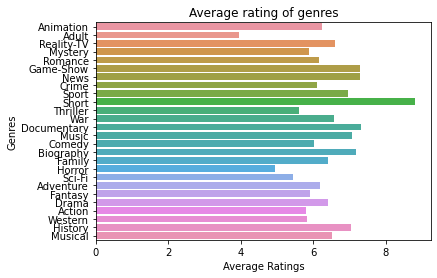

In [27]:
# To plot genres based on average rating to find the top rated genres

genres_names = list(y_values.keys())
genres_rating = list(y_values.values())
sns.barplot(x = genres_rating,
            y = genres_names)
plt.xlabel("Average Ratings")
plt.ylabel("Genres")
plt.title("Average rating of genres")
plt.show()

From the plot it is evident that the top genres with highest ratings are <b>Short,Documentary,Game-Show</b>

### 2. Top Genres based on Number of Votes

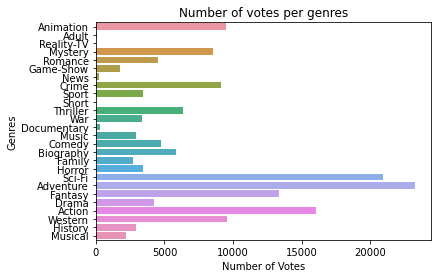

In [28]:
# To plot genres based on number of votes.
x_values = gen
Numvotes_values = {}
for x in x_values:
   Numvotes_values[x] = imdb_merged[imdb_merged[x] == 1]['Numvotes'].mean()

genres_names = list(Numvotes_values.keys())
genres_numvotes = list(Numvotes_values.values())
sns.barplot(x = genres_numvotes,
            y = genres_names)
plt.xlabel("Number of Votes")
plt.ylabel("Genres")
plt.title("Number of votes per genres")
plt.show()

<b>From this plot it is evident that maximum number of votes was for the genres Adventure,Sci-Fi,Action.</b>

### 3.Top Genres based on Revenue

It is evident from the below analysis that maximum gross revenue was obtained in the genres
* 1.Sci-Fi
* 2.Adventure
* 3.Animation

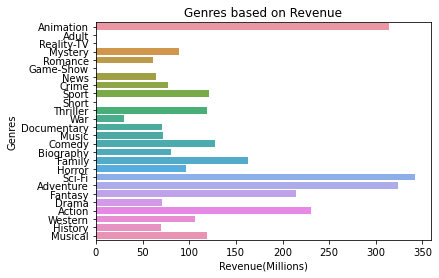

In [29]:
x_values = gen
genre_Revenue_values = {}
for x in x_values:
   genre_Revenue_values[x] = genre_revenue[genre_revenue[x] == 1]['Total Gross(millions)'].mean()

genres_names = list(genre_Revenue_values.keys())
genres_Revenue = list(genre_Revenue_values.values())
sns.barplot(x = genres_Revenue,
            y = genres_names)
plt.xlabel("Revenue(Millions)")
plt.ylabel("Genres")
plt.title("Genres based on Revenue")
plt.show()

From the above three analysis we can infer the following:
* Inorder to get more revenue genres like Sci-Fi,Adventure,Animation is to be considered.
* For getting good rating genres like Short,Documentary,Game-Show is preferrable.
* Highest number of votes was obtained for genres like Adventure,Sci-Fi,Action.

## To find the relation between Rating and Number of votes
--------
From the below plots it is understood there is no relation between the number of votes and average rating.

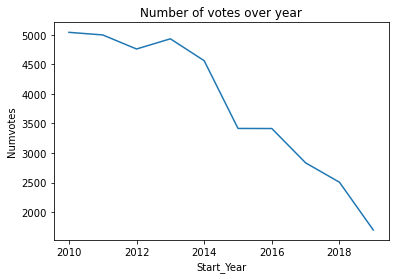

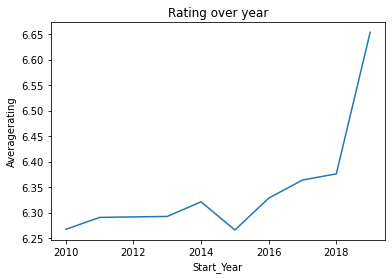

In [30]:
# To find the relation between Rating and Number of votes

sns.lineplot(x = 'Start_Year',y = 'Numvotes',data = imdb_merged,ci = None)
plt.title("Number of votes over year")
plt.show()

# To find the relation between Rating and Average rating

sns.lineplot(x = 'Start_Year',y = 'Averagerating',data = imdb_merged,ci = None)
plt.title("Rating over year")
plt.show()

## <b>Genres with most number of movies</b>


Number of movies based on genres

Animation: 1615
Adult: 2
Reality-TV: 13
Mystery: 2889
Romance: 5976
Game-Show: 2
News: 575
Crime: 4338
Sport: 1099
Short: 1
Thriller: 7583
War: 795
Documentary: 16423
Music: 2438
Comedy: 15514
Biography: 3693
Family: 3231
Horror: 6917
Sci-Fi: 2048
Adventure: 3621
Fantasy: 1969
Drama: 28394
Action: 6297
Western: 256
History: 2704
Musical: 638


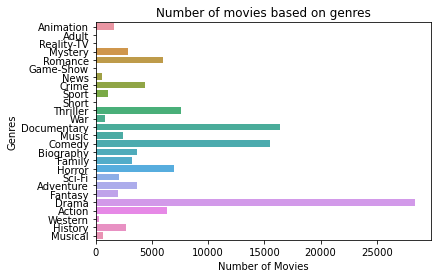

In [31]:
# To find the number of movies based on genres
count = {}
print ("Number of movies based on genres\n")
for genres in gen:
   print(genres + ":" ,len(imdb_merged[imdb_merged["Genres"].str.contains(genres,case=False)]))
   temp = genres + ":" ,len(imdb_merged[imdb_merged["Genres"].str.contains(genres,case=False)])
   count[genres] = len(imdb_merged[imdb_merged["Genres"].str.contains(genres,case=False)])


names = list(count.keys())
values = list(count.values())

sns.barplot(x = values,
            y = names)
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.title("Number of movies based on genres")
plt.show()

<b>From this plot we can infer that maximum number of movies are created in the genre Drama,Documentary and Comedy.</b>

---------------

# Analysis of the trends in top voted movies in the IMDB data Set

In [32]:
# To get 5 top voted movies and genres in each year for the period 2010-2019

year_val = sorted(imdb_merged["Start_Year"].unique())
grouped = imdb_merged.groupby(["Start_Year"])
grouped
print("\t\tTop 5 movies and genres based on number of votes for the period 2010-2019")
for year in year_val:
    df_new = grouped.get_group(year)
    display(df_new.nlargest(5,"Numvotes")[["Primary_Title","Start_Year","Genres","Numvotes"]].set_index("Primary_Title"))


		Top 5 movies and genres based on number of votes for the period 2010-2019


,Start_Year,Genres,Numvotes
Primary_Title,,,
Inception,2010,"Action,Adventure,Sci-Fi",1841066
Shutter Island,2010,"Mystery,Thriller",1005960
Toy Story 3,2010,"Adventure,Animation,Comedy",682218
Iron Man 2,2010,"Action,Adventure,Sci-Fi",657690
Black Swan,2010,"Drama,Thriller",648854


,Start_Year,Genres,Numvotes
Primary_Title,,,
Harry Potter and the Deathly Hallows: Part 2,2011,"Adventure,Drama,Fantasy",691835
Thor,2011,"Action,Adventure,Fantasy",683264
The Intouchables,2011,"Biography,Comedy,Drama",677343
Captain America: The First Avenger,2011,"Action,Adventure,Sci-Fi",668137
X-Men: First Class,2011,"Action,Adventure,Sci-Fi",608930


,Start_Year,Genres,Numvotes
Primary_Title,,,
The Dark Knight Rises,2012,"Action,Thriller",1387769
Django Unchained,2012,"Drama,Western",1211405
The Avengers,2012,"Action,Adventure,Sci-Fi",1183655
The Hunger Games,2012,"Action,Adventure,Sci-Fi",795227
The Hobbit: An Unexpected Journey,2012,"Adventure,Family,Fantasy",719629


,Start_Year,Genres,Numvotes
Primary_Title,,,
The Wolf of Wall Street,2013,"Biography,Crime,Drama",1035358
Gravity,2013,"Drama,Sci-Fi,Thriller",710018
Iron Man 3,2013,"Action,Adventure,Sci-Fi",692794
Man of Steel,2013,"Action,Adventure,Sci-Fi",647288
12 Years a Slave,2013,"Biography,Drama,History",577301


,Start_Year,Genres,Numvotes
Primary_Title,,,
Interstellar,2014,"Adventure,Drama,Sci-Fi",1299334
Guardians of the Galaxy,2014,"Action,Adventure,Comedy",948394
Gone Girl,2014,"Drama,Mystery,Thriller",761592
Captain America: The Winter Soldier,2014,"Action,Adventure,Sci-Fi",666252
The Grand Budapest Hotel,2014,"Adventure,Comedy,Crime",633604


,Start_Year,Genres,Numvotes
Primary_Title,,,
Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Fantasy",784780
Mad Max: Fury Road,2015,"Action,Adventure,Sci-Fi",780910
The Martian,2015,"Adventure,Drama,Sci-Fi",680116
Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",665594
The Revenant,2015,"Action,Adventure,Biography",621193


,Start_Year,Genres,Numvotes
Primary_Title,,,
Deadpool,2016,"Action,Adventure,Comedy",820847
Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",583507
Batman v Superman: Dawn of Justice,2016,"Action,Adventure,Fantasy",576909
Suicide Squad,2016,"Action,Adventure,Fantasy",533039
Arrival,2016,"Drama,Mystery,Sci-Fi",515483


,Start_Year,Genres,Numvotes
Primary_Title,,,
Logan,2017,"Action,Drama,Sci-Fi",560270
Wonder Woman,2017,"Action,Adventure,Fantasy",487527
Thor: Ragnarok,2017,"Action,Adventure,Comedy",482995
Guardians of the Galaxy Vol. 2,2017,"Action,Adventure,Comedy",482917
Dunkirk,2017,"Action,Drama,History",466580


,Start_Year,Genres,Numvotes
Primary_Title,,,
Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",670926
Black Panther,2018,"Action,Adventure,Sci-Fi",516148
Deadpool 2,2018,"Action,Adventure,Comedy",391735
Bohemian Rhapsody,2018,"Biography,Drama,Music",345466
A Quiet Place,2018,"Drama,Horror,Sci-Fi",305031


,Start_Year,Genres,Numvotes
Primary_Title,,,
Avengers: Endgame,2019,"Action,Adventure,Sci-Fi",441135
Captain Marvel,2019,"Action,Adventure,Sci-Fi",296225
Glass,2019,"Drama,Sci-Fi,Thriller",133793
Shazam!,2019,"Action,Adventure,Comedy",109051
Us,2019,"Horror,Mystery,Thriller",102511


<b>Based on the above analysis.The genre that is currently getting most number of public votes and the genre which has received the maximum number of votes among the movies/titles for the period 2010-2019 is Action,Adventure,Sci-FI.</b>


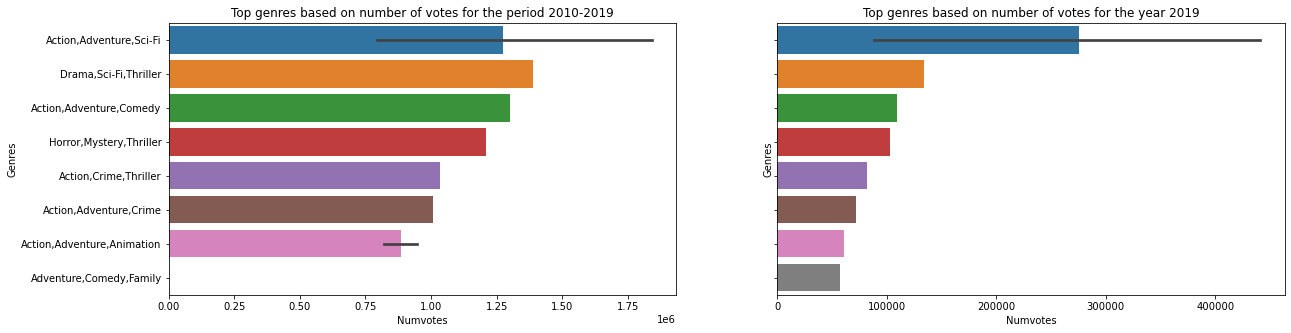

In [33]:
# Top genres based on number of votes for the period 2010-2019
fig, axes = plt.subplots(1, 2, figsize = (20, 5), sharey = True)
sns.barplot(ax = axes[0],
            y = "Genres",
            x = "Numvotes",
            data = imdb_merged.nlargest(10,"Numvotes"))
axes[0].set_title("Top genres based on number of votes for the period 2010-2019")

# Top genres based on number of votes for the year 2019
sns.barplot(ax = axes[1],
            y = "Genres",
            x = "Numvotes",
            data = df_new.nlargest(10,"Numvotes"))
axes[1].set_title("Top genres based on number of votes for the year 2019")
plt.show()

# Analysis of Top 10 movies with Highest Gross

In [34]:
# Top 10 movies with Highest domestic gross
top_ten_dom_movies = bom_gross_df.nlargest(10,"Domestic_Gross")[["Title","Studio","Domestic_Gross","Year"]].set_index("Title")
top_ten_dom_movies

,Studio,Domestic_Gross,Year
Title,,,
Star Wars: The Force Awakens,BV,936700000.0,2015
Black Panther,BV,700100000.0,2018
Avengers: Infinity War,BV,678800000.0,2018
Jurassic World,Uni.,652300000.0,2015
Marvel's The Avengers,BV,623400000.0,2012
Star Wars: The Last Jedi,BV,620200000.0,2017
Incredibles 2,BV,608600000.0,2018
Rogue One: A Star Wars Story,BV,532200000.0,2016
Beauty and the Beast (2017),BV,504000000.0,2017


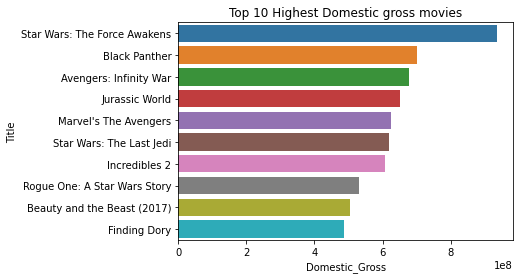

In [35]:
# Plotting the top movies with highest domestic gross
sns.barplot(x = 'Domestic_Gross',
            y = top_ten_dom_movies.index,
            data = top_ten_dom_movies)
plt.title("Top 10 Highest Domestic gross movies")
plt.show()



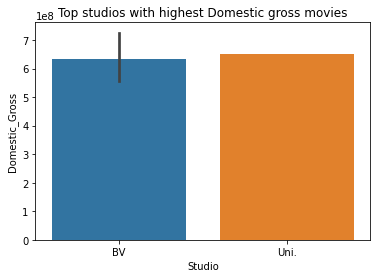

In [36]:
# Plotting the studios which produced movies with Domestic gross
sns.barplot(y = 'Domestic_Gross',
            x = 'Studio',
            data = top_ten_dom_movies)
plt.title("Top studios with highest Domestic gross movies")
plt.show()


Movies with highest domestic gross were produced by studios BV and Uni. BV studio has produced the movie with highest domestic gross which was Star Wars: The Force Awakens in 2015

In [37]:
# Top 10 movies with Highest Foreign Gross


top_foreign_movies = bom_gross_df.nlargest(10,"Foreign_Gross")[["Title","Studio","Foreign_Gross","Year"]].set_index("Title")
top_foreign_movies

,Studio,Foreign_Gross,Year
Title,,,
Harry Potter and the Deathly Hallows Part 2,WB,960500000.0,2011
Avengers: Age of Ultron,BV,946400000.0,2015
Marvel's The Avengers,BV,895500000.0,2012
Jurassic World: Fallen Kingdom,Uni.,891800000.0,2018
Frozen,BV,875700000.0,2013
Wolf Warrior 2,HC,867600000.0,2017
Transformers: Age of Extinction,Par.,858600000.0,2014
Minions,Uni.,823400000.0,2015
Aquaman,WB,812700000.0,2018


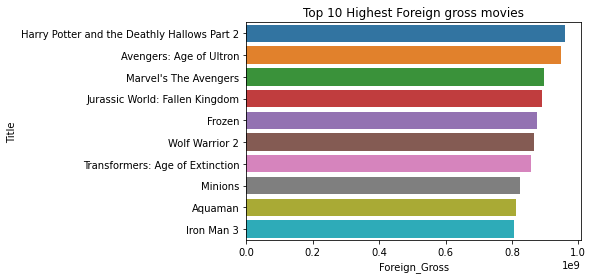

In [38]:
# Plotting the top movies with highest foreign gross
sns.barplot(x = 'Foreign_Gross',
            y = top_foreign_movies.index,
            data = top_foreign_movies)
plt.title("Top 10 Highest Foreign gross movies")
plt.show()


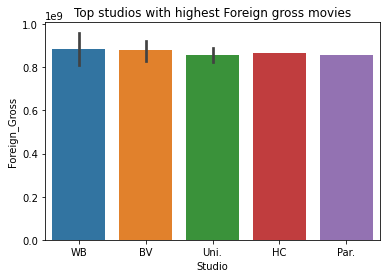

In [39]:
# Plotting the studios which produced movies with Foreign gross
sns.barplot(y = 'Foreign_Gross',
            x = 'Studio',
            data = top_foreign_movies)
plt.title("Top studios with highest Foreign gross movies")
plt.show()

Movies with highest foreign gross were produced by studios WB,BV,Uni.,HC,Par. WB studio has produced the movie with highest domestic gross which was Harry Potter and the Deathly Hallows Part 2 in 2015.

Based on the above plots we cannot confirm about the studio that is performing well in market as the movies they produced were in 2011 and 2015.Hence we need to analyze the domestic gross and foreign gross of the top studios over the years.

## Analysis of Domestic gross of top studios

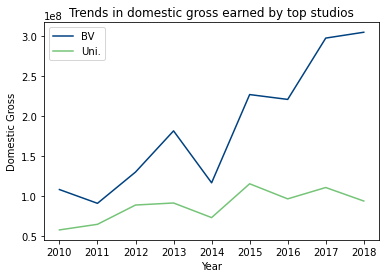

In [40]:
top_studios = top_ten_dom_movies['Studio'].unique()
COLORS = {'WB':'Blues','BV':'ocean','Uni.':'Greens_r','HC':'Dark2','Par.':'Wistia'}

for studio in top_studios:
        Stud_val = bom_gross_df.groupby('Studio').get_group(studio)
        sns.lineplot(x = Stud_val['Year'].values,
                     y = Stud_val['Domestic_Gross'].values,
                     hue = Stud_val['Studio'].values,
                     ci = None,
                     palette = COLORS[studio] )
        plt.title("Trends in domestic gross earned by top studios")
        plt.xlabel("Year")
        plt.ylabel("Domestic Gross")

From the above plot it is evident that BV studio is earning highest domestic gross consistenly.

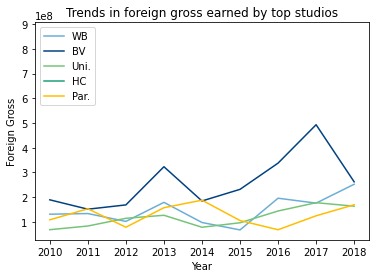

In [41]:
top_studios = top_foreign_movies['Studio'].unique()
COLORS = {'WB':'Blues','BV':'ocean','Uni.':'Greens_r','HC':'Dark2','Par.':'Wistia'}

for studio in top_studios:
        Stud_val = bom_gross_df.groupby('Studio').get_group(studio)
        sns.lineplot(x = Stud_val['Year'].values,
                     y = Stud_val['Foreign_Gross'].values,
                     hue = Stud_val['Studio'].values,
                     ci = None, 
                     palette = COLORS[studio] )
        plt.title("Trends in foreign gross earned by top studios")
        plt.xlabel("Year")
        plt.ylabel("Foreign Gross")

From this plot we can see that even though BV studio has highest foreign gross,there has been a dip in its revenue earned in 2018.But the performance of WB studio has been increasing.

## Conclusions

This analysis leads to three recommendations for the new Microsoft Movie Studio.

* Inorder to get maximum revenue genres like Sci-Fi,Adventure,Animation is to be considered.
* For getting good rating genres like Short,Documentary,Game-Show is preferrable.
* Genres like Adventure,Sci-Fi,Action will enable to get maximum number of votes.
* For collaboration BV studio can be considered which has performed consistently on the basis of domestic gross    earned.WB studio can also be considered as its performance has been increasing lately on the basis of foreign gross earned.




### Limitations

Even though we understood the latest trends in terms of genres,the success of the movie studio depends on the selection of crew members and getting a story based on the genre recommendation that can produce box office hits.